<a href="https://colab.research.google.com/github/juned202/M.Tech.-Thesis-JUNED-/blob/main/document_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

In [ ]:
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 81 kB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 367 kB 53.3 MB/s 
     |████████████████████████████████| 3.2 MB 47.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.5.3
    Uninstalling tensorflow-2.5.3:
      Successfully uninstalled tensorflow-2.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 5.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 5.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.5.0 requires tensorflow<2.6,>=2.5.0, but you have tensorflow 1.13.1 which is incompatible.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import pandas as pd
import numpy as np
from gensim.parsing.preprocessing import preprocess_string
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import json
import nltk 

# BOW

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
def bow(path):
       
      # extract data from the path
      data = []
      for line in open(path, 'r'):
          data.append(json.loads(line))
      num=len(data)

      # data preprocessing

      doc_preprocess = []
      for x in range(num):
          text=(data[x]['_source']['title'])
          doc_preprocess.append((text))
      CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                                stop_words='english')
      #transform
      Count_data = CountVec.fit_transform(doc_preprocess)
      
      #create dataframe
      cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
      return cv_dataframe

In [6]:
data=bow('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
#top 5 words of each documents
df = data.iloc[:5,:]
max_value = df.apply(pd.Series.nlargest, axis=1, n=5)
max_value 

,asymmetric,aware,based,context,core,coupled,damage,detection,determination,double,...,field,gan,hydraulic,lidar,light,maneuvering,matrix,model,multiagent,pose
0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0
4,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Tf_Idf

In [ ]:
def tfidf(path):
       
      # extract data from the path
      data = []
      for line in open(path, 'r'):
          data.append(json.loads(line))
      num=len(data)

      # data preprocessing

      doc_preprocess = []
      for x in range(num):
          text=(data[x]['_source']['title'])
          doc_preprocess.append((text))
          
      # calculate tfidf using sklearn
      
      tfvec = TfidfVectorizer()
      tidf= tfvec.fit_transform(doc_preprocess)
      frame = pd.DataFrame(tidf.toarray(), columns = tfvec.get_feature_names_out())
      return frame


In [ ]:
vector=tfidf('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json')

In [ ]:
#top 5 words of each documents
df = vector.iloc[:5,:]
max_value = df.apply(pd.Series.nlargest, axis=1, n=5)
max_value 

,asymmetric,context,coupled,damage,determination,double,factorization,gan,hydraulic,insulator,...,pillar,porcelain,pose,pressure,reconstruction,retweet,sensing,spacecraft,target,tensor
0,NaN,NaN,NaN,0.294692,NaN,NaN,NaN,NaN,NaN,0.343467,...,0.405657,0.421325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.311072,0.340013,NaN,NaN,NaN,0.359182,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.528736,NaN,NaN,NaN,0.354963
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.392611,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.315146,NaN
3,NaN,NaN,NaN,NaN,0.384172,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.457009,NaN,0.320949,NaN,NaN,0.544494,NaN,NaN
4,0.406631,NaN,NaN,NaN,NaN,0.369221,NaN,NaN,0.486515,NaN,...,NaN,NaN,NaN,0.397277,NaN,NaN,0.326896,NaN,NaN,NaN


# Word2vec

In [ ]:
# word2vec
def word2vec(path):
       
      # extract data from the path
      data = []
      for line in open(path, 'r'):
          data.append(json.loads(line))
      num=len(data)

      # data preprocessing

      doc_preprocess = []
      for x in range(num):
          text=(data[x]['_source']['title'])
          doc_preprocess.append(preprocess_string(text))

      # train model on our data set


      cbow = Word2Vec(sentences=doc_preprocess,size=100, window=5, min_count=5, workers=4, sg=0)

      # created vector for every word in document

      dvec = np.zeros((len(doc_preprocess),100))
      for n in range(len(doc_preprocess)):
          for token in doc_preprocess[n]:
              try:
                  dvec[n,:] += cbow.wv[token]
              except:
                  dvec[n,:] += np.zeros((100,))
      
      # avarging vector for every document

      for n in range(len(doc_preprocess)):
          dvec[n,:] = dvec[n,:]/len(doc_preprocess[n])

      # return vector of vector 
      
      return dvec
 



In [ ]:
# function  calling

embedding=word2vec('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


# BERT

In [ ]:
!pip install tensorflow_text==2.5

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
def bert(path):
      preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
      encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
      bert_preprocess_model = hub.KerasLayer(preprocess_url)
      data = []
      for line in open(path, 'r'):
          data.append(json.loads(line))
      num=len(data)
      doc_preprocess = []
      for x in range(num):
          text=(data[x]['_source']['title'])
          doc_preprocess.append((text))
      doc_preprocess=doc_preprocess[:100]
      text_test =doc_preprocess # ['nice movie indeed','I love python programming']
      text_preprocessed = bert_preprocess_model(text_test)
      bert_model = hub.KerasLayer(encoder_url)
      bert_results = bert_model(text_preprocessed)
      return bert_results['pooled_output']

In [ ]:
bert_vector=bert('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json')

In [ ]:
bert_vector[0]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-0.93932706, -0.57368815, -0.9699553 ,  0.8401189 ,  0.8117893 ,
       -0.29842472,  0.8555565 ,  0.4355585 , -0.90394884, -0.9999971 ,
       -0.80483574,  0.9771829 ,  0.9727205 ,  0.7227436 ,  0.8730064 ,
       -0.8738592 , -0.5665202 , -0.70155203,  0.2993684 , -0.3805136 ,
        0.76470244,  0.9999997 , -0.5333916 ,  0.45938373,  0.5047493 ,
        0.99618095, -0.8431892 ,  0.88057053,  0.9595558 ,  0.83061665,
       -0.7615914 ,  0.6076447 , -0.98790103, -0.36875123, -0.97103935,
       -0.99335825,  0.6958791 , -0.70426536, -0.11250459, -0.22187784,
       -0.8148341 ,  0.57849675,  0.9999959 , -0.00104235,  0.6883848 ,
       -0.43262613, -1.        ,  0.40175068, -0.8839215 ,  0.96832013,
        0.9403341 ,  0.9559266 ,  0.38507536,  0.6801159 ,  0.6235609 ,
       -0.7209404 ,  0.14614527,  0.2583544 , -0.51500136, -0.68712395,
       -0.7046101 ,  0.60640407, -0.93445235, -0.845307  ,  0.96858007,
        0.890559

# Glove

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
len(glove_model["good"])

300

In [ ]:
glove_model.most_similar("king")

[('queen', 0.6336469054222107),
 ('prince', 0.619662344455719),
 ('monarch', 0.5899620652198792),
 ('kingdom', 0.5791267156600952),
 ('throne', 0.5606487989425659),
 ('ii', 0.5562329888343811),
 ('iii', 0.5503199100494385),
 ('crown', 0.5224862694740295),
 ('reign', 0.521735429763794),
 ('kings', 0.5066401362419128)]

In [ ]:
glove_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.6770139336585999)]

In [ ]:
data = []
for line in open('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json', 'r'):
    data.append(json.loads(line))
    num=len(data)

# data preprocessing

doc_preprocess = []
for x in range(num):
    text=(data[x]['_source']['title'])
    doc_preprocess.append((text))

In [ ]:
doc_preprocess

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
temp=[]
num = len(doc_preprocess)
for x in range(num): 
    file_content = doc_preprocess[x]
    tokens = nltk.word_tokenize(file_content)
    temp.append(tokens)

In [ ]:
vocab1=[]
for x in range(len(temp)):
  for j in range(len(temp[x])):
    vocab1.append(temp[x][j])

In [ ]:
vocab1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


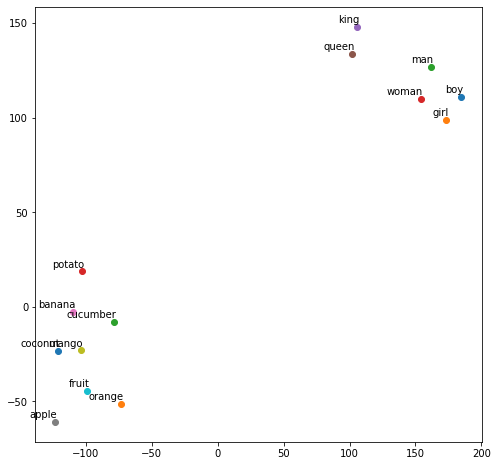

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange", "cucumber", "potato"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)

In [ ]:
def bow(path):
       
      # extract data from the path
      data = []
      for line in open(path, 'r'):
          data.append(json.loads(line))
      num=len(data)

      # data preprocessing

      doc_preprocess = []
      for x in range(num):
          text=(data[x]['_source']['title'])
          doc_preprocess.append((text))

      model = Tokenizer()
      model.fit_on_texts(doc_preprocess)
      rep = model.texts_to_matrix(text, mode='count')
      print(f'Key : {list(model.word_index.keys())}')
      return rep

In [ ]:
vec=bow('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json')

Key : ['of', 'for', 'and', 'a', 'in', 'the', 'based', 'on', 'using', 'with', 'to', 'an', 'system', 'data', 'model', 'algorithm', 'analysis', 'optimization', 'systems', 'method', 'detection', 'approach', 'image', 'by', 'software', 'learning', 'multi', 'cloud', 'design', 'time', 'classification', 'computing', 'network', 'from', 'performance', 'information', 'application', 'knowledge', 'web', 'laser', 'recognition', 'fuzzy', 'networks', 'development', 'applications', 'study', 'models', 'high', 'efficient', 'research', 'dynamic', 'support', 'modeling', 'segmentation', 'new', 'management', 'distributed', 'adaptive', 'hybrid', 'optical', 'algorithms', 'evaluation', 'machine', 'implementation', 'clustering', 'real', 'parallel', 'automatic', 'security', 'programming', 'prediction', 'framework', 'decision', 'particle', 'techniques', 'large', 'mobile', 'architecture', 'object', 'improved', 'images', 'semantic', 'mining', 'swarm', 'neural', 'novel', 'computer', 'extraction', 'problem', 'video', '

In [ ]:
vec[0]

array([0., 0., 0., ..., 0., 0., 0.])

# similarity

In [ ]:
def similar(path,vector):
      
      data = []
      for line in open(path, 'r'):
          data.append(json.loads(line))
      num=len(data)
      doc_no = 0
      cosine_doc = {}
      for doc in vector:
        cosine = np.dot(doc,vector[0])/(np.linalg.norm(doc)*np.linalg.norm(vector[0]))
        cosine_doc[doc_no] = cosine
        doc_no += 1
      A=cosine_doc
      d =  sorted(A, key=A.get, reverse=True)[:5]
      p =  sorted(A, key=A.get)[:5]
      print("--------------------------------------------------------------------------")
      print(" ")
      print(data[0]['_source']['title'])
      print("  ")
      print("LOWEST SIMILAR")
      print(" |")
      print("\_/")
      print(" ")
      for i in range(5):
        print(data[p[i]]['_source']['title'])
        print("       ")

      print("--------------------------------------------------------------------------")
      print(" ")
      print(data[0]['_source']['title'])
      print(" ")
      print("MAXIMMUM SIMLAR")
      print(" |")
      print("\_/")
      print("  ")
      for i in range(5):
        print(data[d[i]]['_source']['title'])
        print("       ")

In [ ]:
similar('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json',embedding)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


--------------------------------------------------------------------------
 
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
  
LOWEST SIMILAR
 |
\_/
 
The SuperPascal software
       
Software Malleability: We're Losing it!
       
Sparsified SGD with Memory
       
On a Triptych of Software Development
       
Development of Oberon-0 using YAJCo
       
--------------------------------------------------------------------------
 
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
 
MAXIMMUM SIMLAR
 |
\_/
  
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
       
Retinal Microaneurysm Detection Based on Intensity Profile Analysis
       
Lip movement and speech synchronization detection based on multimodal shift-invariant dictionary
       
StirTraceV2.0: Enhanced Benchmarking and Tuning of Printed Fingerprint Detection
       
A survey of signatu

In [ ]:
tf=vector.to_numpy()
similar('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json',tf)

--------------------------------------------------------------------------
 
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
  
LOWEST SIMILAR
 |
\_/
 
Retweet Prediction Using Context-Aware Coupled Matrix-Tensor Factorization
       
Multiagent Light Field Reconstruction and Maneuvering Target Recognition via GAN
       
Constrained Reinforcement Learning Has Zero Duality Gap
       
A New Approach to Detect At-Risk Learning Communities in Social Networks
       
Reinforcing Diversity Company Policies: Insights from StackOverflow Developers Survey
       
--------------------------------------------------------------------------
 
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
 
MAXIMMUM SIMLAR
 |
\_/
  
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
       
Robust Locator Layout Design for B-pillar Based on Taguchi Experiment
       
Intern

In [ ]:
similar('/content/drive/Shareddrives/M.Tech.Thesis(Juned)/DATASET/es_demo.json',bert_vector)

--------------------------------------------------------------------------
 
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
  
LOWEST SIMILAR
 |
\_/
 
ST ] 3 O ct 2 01 9 Privately detecting changes in unknown distributions
       
Broadband Supercontinuum Generation from a Tm Oscillator in a Highly Nonlinear Silica Fiber
       
Leaf classification with improved image feature based on the seven moment invariant
       
Distance variety preserving hashing for large‐scale retrieval
       
Unique Fog Computing Taxonomy for Evaluating Cloud Services
       
--------------------------------------------------------------------------
 
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
 
MAXIMMUM SIMLAR
 |
\_/
  
Research on NOFRF Entropy-Based Detection Method for Early Damage of Pillar Porcelain Insulator
       
An integrated algorithm for multi-agent fault-tolerant scheduling based on MOEA
     